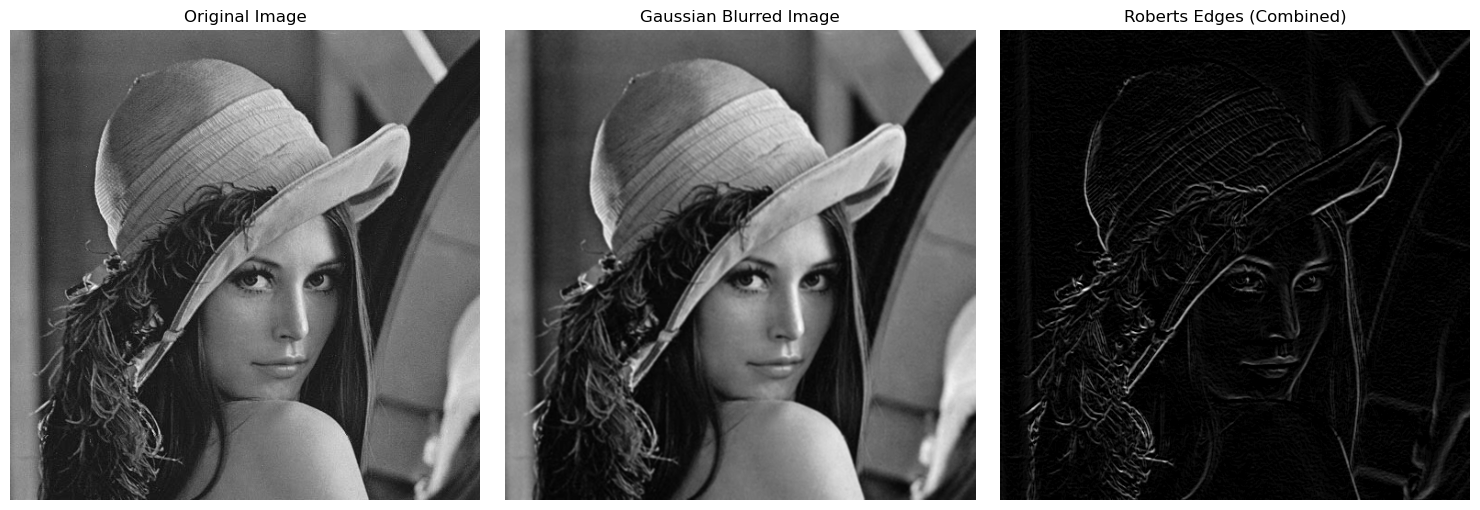

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the image in grayscale
#image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded properly
if image is None:
    print("Error: Image could not be loaded.")
else:
    # Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(image, (3, 3), sigmaX=1)

    # Define Roberts Cross kernels for x and y directions
    roberts_x = np.array([
        [1, 0],
        [0, -1]
    ])
    
    roberts_y = np.array([
        [0, 1],
        [-1, 0]
    ])

    # Apply Roberts Cross operator in x and y directions to the blurred image
    edges_x = cv2.filter2D(blurred_image, -1, roberts_x)
    edges_y = cv2.filter2D(blurred_image, -1, roberts_y)

    # Combine edges from x and y direction to get the final Roberts edge-detected image
    roberts_edges = cv2.addWeighted(edges_x, 0.5, edges_y, 0.5, 0)

    # Plot the images in a single row
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(blurred_image, cmap='gray')
    plt.title("Gaussian Blurred Image")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(roberts_edges, cmap='gray')
    plt.title("Roberts Edges (Combined)")
    plt.axis("off")

    # Show the plot
    plt.tight_layout()
    plt.show()
